# IMG Preprocess

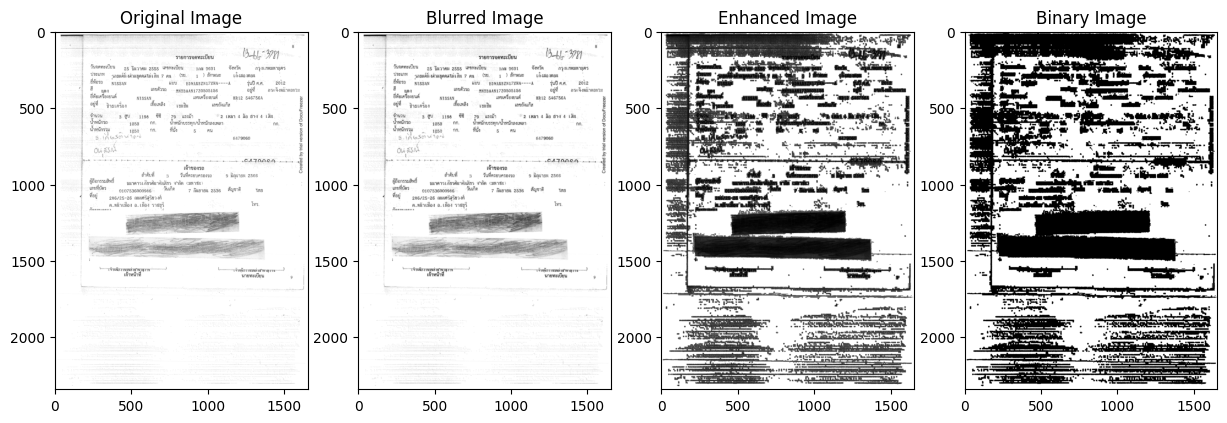

PSNR: 7.00 dB
SSIM: 0.5213


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# อ่านภาพ
image_path = "/content/CR6709003941_7.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# ขยายตัวหนังสือและปรับปรุงคุณภาพ
# ใช้ GaussianBlur ลด noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)
# ปรับ contrast
equalized = cv2.equalizeHist(blurred)

# แยกพื้นหลังด้วย binary thresholding
_, binary = cv2.threshold(equalized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# คำนวณค่า PSNR และ SSIM
psnr_value = cv2.PSNR(image, equalized)
ssim_value = ssim(image, equalized, data_range=equalized.max() - equalized.min())

# Plot ผลลัพธ์
plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 4, 2), plt.imshow(blurred, cmap='gray'), plt.title("Blurred Image")
plt.subplot(1, 4, 3), plt.imshow(equalized, cmap='gray'), plt.title("Enhanced Image")
plt.subplot(1, 4, 4), plt.imshow(binary, cmap='gray'), plt.title("Binary Image")
plt.show()

# แสดง metrics
print(f"PSNR: {psnr_value:.2f} dB")
print(f"SSIM: {ssim_value:.4f}")


## Realesrgan

In [ ]:
# Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 759, done.
remote: Total 759 (delta 0), reused 0 (delta 0), pack-reused 759 (from 1)
Receiving objects: 100% (759/759), 5.39 MiB | 15.71 MiB/s, done.
Resolving deltas: 100% (408/408), done.
/content/Real-ESRGAN
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 13.6 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214819 sha256=9ebf46f7e6bb155ed425c2abc62ba1fb02b83aaeafbf20e222c403b9773d7362
  Stored in directory: /root/.cache/pip/wheels/38/83/99/2d8437cc652a01af27df5ff037a4075e95b52d67705c5f30ca
Successfully built basicsr
  

In [ ]:
import os
import shutil

upload_folder = 'upload'
result_folder = 'results'

# ลบโฟลเดอร์เก่าหากมี
if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)

# สร้างโฟลเดอร์ใหม่
os.mkdir(upload_folder)
os.mkdir(result_folder)

# กำหนดพาธของไฟล์ที่ต้องการ
uploaded = "/content/CR6709003941_7.jpg"

# คัดลอกไฟล์จากพาธที่กำหนดไปยังโฟลเดอร์ upload
dst_path = os.path.join(upload_folder, os.path.basename(uploaded))
print(f'Move {uploaded} to {dst_path}')
shutil.move(uploaded, dst_path)


Move /content/CR6709003941_7.jpg to upload/CR6709003941_7.jpg


'upload/CR6709003941_7.jpg'

In [ ]:
!pip install torchvision==0.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu121
    Uninstalling torch-2.5.1+cu121:
      Successfully uninstalled torch-2.5.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1+cu121
    Uninstalling torchvision-0.20.1+cu121:
      Successfully uninstalled torchvision-0.20.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
peft 0.13.2 requires torch>=1.13.0, but you have torch 1.11.0 which is incompatible.
torchaudio 2.5.1+cu121 requires torch==2.5.1, but you have torch 1.11.0 which is incompatible.


In [ ]:
!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 3.5 --tile 100

Testing 0 CR6709003941_7
	Tile 1/408
	Tile 2/408
	Tile 3/408
	Tile 4/408
	Tile 5/408
	Tile 6/408
	Tile 7/408
	Tile 8/408
	Tile 9/408
	Tile 10/408
	Tile 11/408
	Tile 12/408
	Tile 13/408
	Tile 14/408
	Tile 15/408
	Tile 16/408
	Tile 17/408
	Tile 18/408
	Tile 19/408
	Tile 20/408
	Tile 21/408
	Tile 22/408
	Tile 23/408
	Tile 24/408
	Tile 25/408
	Tile 26/408
	Tile 27/408
	Tile 28/408
	Tile 29/408
	Tile 30/408
	Tile 31/408
	Tile 32/408
	Tile 33/408
	Tile 34/408
	Tile 35/408
	Tile 36/408
	Tile 37/408
	Tile 38/408
	Tile 39/408
	Tile 40/408
	Tile 41/408
	Tile 42/408
	Tile 43/408
	Tile 44/408
	Tile 45/408
	Tile 46/408
	Tile 47/408
	Tile 48/408
	Tile 49/408
	Tile 50/408
	Tile 51/408
	Tile 52/408
	Tile 53/408
	Tile 54/408
	Tile 55/408
	Tile 56/408
	Tile 57/408
	Tile 58/408
	Tile 59/408
	Tile 60/408
	Tile 61/408
	Tile 62/408
	Tile 63/408
	Tile 64/408
	Tile 65/408
	Tile 66/408
	Tile 67/408
	Tile 68/408
	Tile 69/408
	Tile 70/408
	Tile 71/408
	Tile 72/408
	Tile 73/408
	Tile 74/408
	Tile 75/408
	Tile 76/

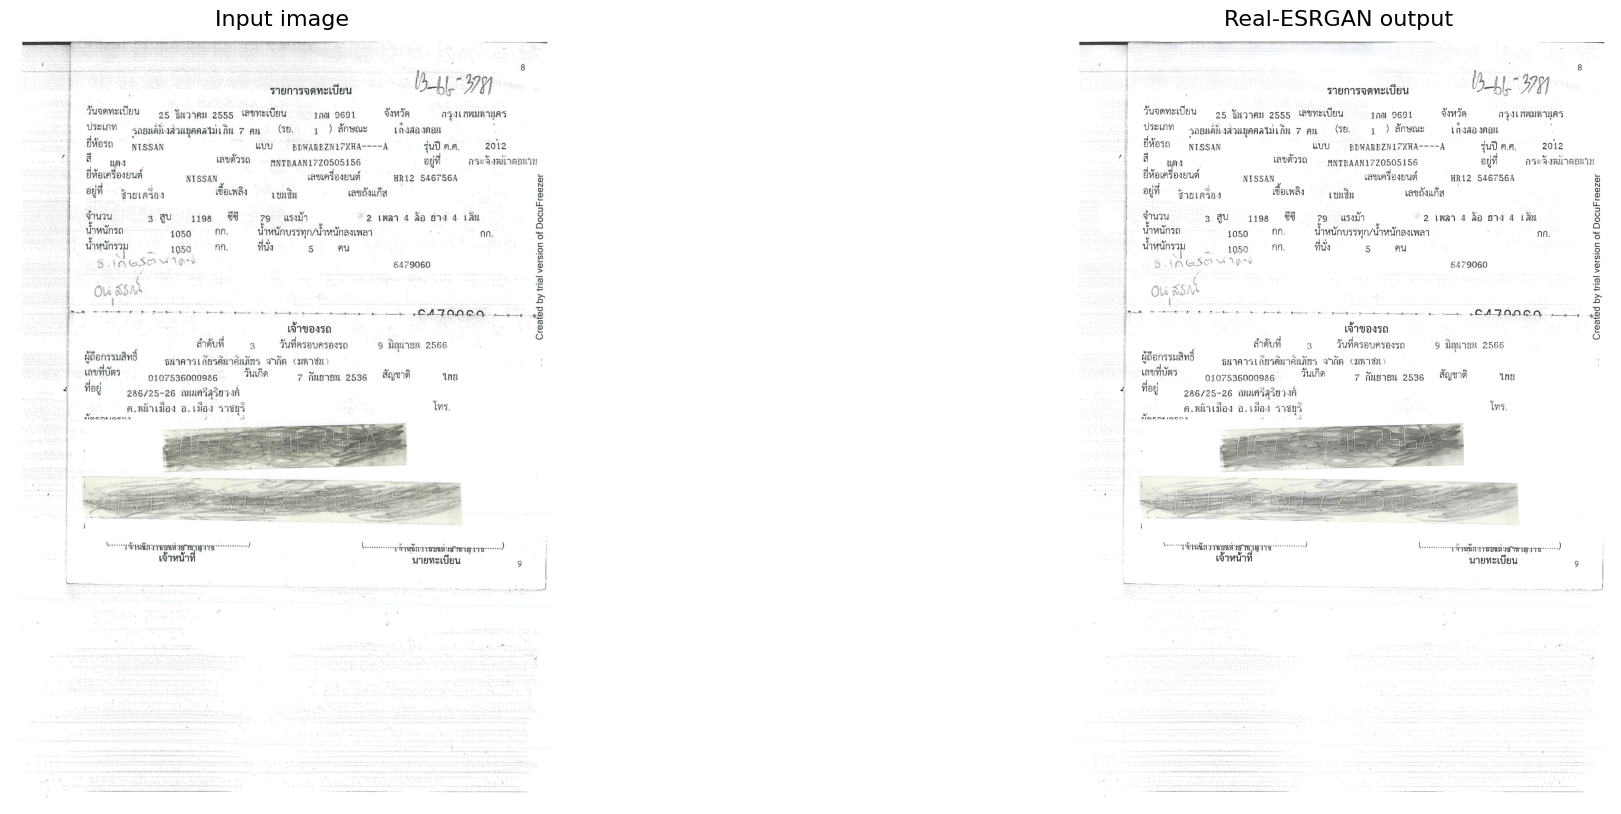

In [ ]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'upload'
result_folder = 'results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

# Pytess

## Tesseract

In [ ]:
# ติดตั้ง Tesseract OCR และ pytesseract
!apt-get install -y tesseract-ocr
!pip install pytesseract

# หากต้องการติดตั้งภาษาเพิ่มเติม (เช่นภาษาไทย)
!apt-get install -y tesseract-ocr-tha

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (31.3 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [ ]:
# ติดตั้ง Flask และ pyngrok บน Google Colab
!pip install pymupdf pytesseract Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 87.9 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y pymupdf

Found existing installation: PyMuPDF 1.24.13
Uninstalling PyMuPDF-1.24.13:
  Successfully uninstalled PyMuPDF-1.24.13


In [ ]:
!pip install pymupdf

  Using cached PyMuPDF-1.24.13-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (3.4 kB)
Using cached PyMuPDF-1.24.13-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (19.8 MB)


In [ ]:
import cv2

# อ่านภาพจากไฟล์
image = cv2.imread(input_file)

# ตรวจสอบขนาดของภาพ
if image is not None:
    height, width, channels = image.shape
    print(f'ขนาดของภาพคือ: {width} x {height} พิกเซล (ช่องสี: {channels})')

    # คำนวณอัตราส่วนภาพ
    aspect_ratio = width / height
    print(f'อัตราส่วนภาพคือ: {aspect_ratio:.2f} (กว้างต่อสูง)')

    # แสดงให้เป็นรูปแบบเศษส่วน
    from math import gcd
    def get_aspect_ratio(w, h):
        divisor = gcd(w, h)
        return (w // divisor, h // divisor)

    aspect_ratio_fraction = get_aspect_ratio(width, height)
    print(f'อัตราส่วนภาพในรูปแบบเศษส่วนคือ: {aspect_ratio_fraction[0]}:{aspect_ratio_fraction[1]}')

ขนาดของภาพคือ: 5789 x 8190 พิกเซล (ช่องสี: 3)
อัตราส่วนภาพคือ: 0.71 (กว้างต่อสูง)
อัตราส่วนภาพในรูปแบบเศษส่วนคือ: 827:1170


In [ ]:
def convert_to_bc(year):
    if year > 2560:
        return year - 543
    else:
        return year
def format_filename(file_name):
    if file_name.startswith('Auction_express'):
        new_name = re.sub(r"(\w+)(\d{2}_\d{1,2}_\d{4})-(\d{2}_\d{2})", r"\1-\2-\3", file_name)
        return new_name
    elif file_name.startswith('SiamInter_Auction'):
        match = re.match(r"SiamInter_Auction-(\d{2}_\d{2})_(\d{4})-(\d{2}_\d{2})", file_name)
        if match:
            year = int(match.group(2))
            new_year = convert_to_bc(year)
            new_name = f"SiamInter_Auction-{match.group(1)}-{new_year}-{match.group(3)}"
            return new_name
    return file_name

import re
from datetime import datetime

def extract_timestamp_from_filename(file_name):
    # ตรวจหาประเภทของ Auction
    if file_name.startswith("SiamInter_Auction"):
        year_offset = 543  # แปลง พ.ศ. เป็น ค.ศ.
    else:
        year_offset = 0  # ใช้ปี ค.ศ. ตามปกติ

    # รองรับรูปแบบ:
    # 1. SiamInter_Auction-15_09_2567-15:37.csv (ใช้ : คั่นเวลา)
    # 2. Auction_express03_02_2025-13_32.csv (ติดกันไม่มี -)
    # 3. Apple_Auction-03_02_2025-13.32.csv (ใช้ . คั่นเวลา)
    # 4. Auction อื่นๆ -03_02_2025-13_32.csv

    match = re.search(r"(\d{2})_(\d{2})_(\d{4})[-_](\d{2})[:._](\d{2})", file_name)

    if match:
        day = int(match.group(1))
        month = int(match.group(2))
        year = int(match.group(3)) - year_offset  # ปรับปีตามประเภทของ Auction
        hour = int(match.group(4))
        minute = int(match.group(5))

        # สร้างวันที่ในรูปแบบ 'YYYY-MM-DD HH:MM:SS'
        timestamp_str = f"{year:04d}-{month:02d}-{day:02d} {hour:02d}:{minute:02d}:00"
        timestamp = datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
        return timestamp

    return None

# ทดสอบตัวอย่าง
filenames = [
    "SiamInter_Auction-15_09_2567-15_37.csv",
    "Auction_express03_02_2025-13_32.csv",
    "Apple_Auction-03_02_2025-13.32.csv",
    "Some_Auction-03_02_2025-13_32.csv"
]

for file in filenames:
    print(f"{file} -> {format_filename(file)}")


SiamInter_Auction-15_09_2567-15_37.csv -> SiamInter_Auction-15_09-2024-15_37
Auction_express03_02_2025-13_32.csv -> Auction_express-03_02_2025-13_32.csv
Apple_Auction-03_02_2025-13.32.csv -> Apple_Auction-03_02_2025-13.32.csv
Some_Auction-03_02_2025-13_32.csv -> Some_Auction-03_02_2025-13_32.csv


In [ ]:
import os
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter
import fitz  # pymupdf
import io
import base64

# ฟังก์ชันสร้าง Base64 ของภาพ
def image_to_base64(image):
    img_bytes = io.BytesIO()
    image.save(img_bytes, format='PNG')
    img_data = img_bytes.getvalue()
    return base64.b64encode(img_data).decode('utf-8')

def preprocess_image(image):
    results = {"Original": image}

    # Right Resolution: ปรับขนาดภาพ
    resolution_image = image.resize((8270, 11700), Image.Resampling.LANCZOS)
    results["Right Resolution"] = resolution_image

    # Image Binarization: แปลงเป็นขาวดำ (Binary)
    gray_image = resolution_image.convert("L")  # แปลงเป็นโหมด Grayscale
    binary_image = gray_image.point(lambda x: 0 if x < 128 else 255, '1')  # thresholding
    binary_image_rgb = binary_image.convert("RGB")  # เปลี่ยนเป็นโหมด RGB
    results["Binarization"] = binary_image_rgb

    # Image Contrast and Sharpness: เพิ่มความคมชัดและความเปรียบต่าง
    enhancer = ImageEnhance.Contrast(binary_image_rgb)
    contrast_image = enhancer.enhance(2)  # เพิ่มความเปรียบต่าง
    sharp_image = contrast_image.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))
    results["Contrast & Sharpness"] = sharp_image

    # Noise Removal: ใช้ Gaussian Blur เพื่อลด Noise
    denoised_image = sharp_image.filter(ImageFilter.GaussianBlur(radius=0.0001))
    results["Noise Removal"] = denoised_image

    return results

# ฟังก์ชัน OCR สำหรับภาพ
def image_to_text_and_html(image_file, save_path):
    img = Image.open(image_file)
    processed_images = preprocess_image(img)
    output_html = ""

    for step, processed_img in processed_images.items():
        image_text = pytesseract.image_to_string(processed_img, lang='tha+eng')
        img_base64 = image_to_base64(processed_img)

        # เพิ่มข้อมูลใน HTML
        output_html += f'''
        <div style="display: flex; align-items: flex-start; margin-bottom: 20px;">
            <div style="flex: 1; margin-right: 20px;">
                <h4>{step}</h4>
                <img src="data:image/png;base64,{img_base64}" class="zoomable">
            </div>
            <div style="flex: 2;">
                <h4>OCR Text ({step})</h4>
                <pre>{image_text}</pre>
            </div>
        </div>
        <hr>
        '''

    # รวม HTML Template
    output_html = f'''
    <html>
    <head>
        <style>
            .zoomable {{
                transition: transform 0.2s;
                max-width: 100%;
                height: auto;
            }}
            .zoomable:hover {{
                transform: scale(1.5);
                z-index: 10;
                position: relative;
            }}
        </style>
    </head>
    <body>
        {output_html}
    </body>
    </html>
    '''

    with open(save_path, 'w', encoding='utf-8') as f:
        f.write(output_html)

# ฟังก์ชัน OCR สำหรับ PDF
def pdf_to_text_and_html(pdf_file, save_path):
    doc = fitz.open(pdf_file)
    output_html = ""

    for page_num in range(doc.page_count):
        page = doc.load_page(page_num)
        pix = page.get_pixmap()
        img = Image.open(io.BytesIO(pix.tobytes()))
        processed_images = preprocess_image(img)

        for step, processed_img in processed_images.items():
            page_text = pytesseract.image_to_string(processed_img, lang='tha+eng')
            img_base64 = image_to_base64(processed_img)

            output_html += f'''
            <div style="display: flex; align-items: flex-start; margin-bottom: 20px;">
                <div style="flex: 1; margin-right: 20px;">
                    <h4>Page {page_num + 1} ({step})</h4>
                    <img src="data:image/png;base64,{img_base64}" class="zoomable">
                </div>
                <div style="flex: 2;">
                    <h4>OCR Text (Page {page_num + 1} - {step})</h4>
                    <pre>{page_text}</pre>
                </div>
            </div>
            <hr>
            '''

    # รวม HTML Template
    output_html = f'''
    <html>
    <head>
        <style>
            .zoomable {{
                transition: transform 0.2s;
                max-width: 100%;
                height: auto;
            }}
            .zoomable:hover {{
                transform: scale(1.5);
                z-index: 10;
                position: relative;
            }}
        </style>
    </head>
    <body>
        {output_html}
    </body>
    </html>
    '''

    with open(save_path, 'w', encoding='utf-8') as f:
        f.write(output_html)

# ฟังก์ชันหลัก
def process_file(input_file, output_html_name):
    save_path = f"{output_html_name}.html"

    # ตรวจสอบว่าเป็น PDF หรือภาพ
    if input_file.lower().endswith('.pdf'):
        pdf_to_text_and_html(input_file, save_path)
    elif input_file.lower().endswith(('.jpg', '.jpeg', '.png')):
        image_to_text_and_html(input_file, save_path)
    else:
        print(f"Unsupported file format: {input_file}")
        return

    print(f"Processed {input_file} and saved to {save_path}")

# ฟังก์ชันสำหรับแสดงผลลัพธ์จากไฟล์ HTML
def display_html_result(html_file):
    from IPython.core.display import display, HTML
    with open(html_file, 'r', encoding='utf-8') as f:
        display(HTML(f.read()))

# ตัวอย่างการใช้งาน
input_file = '/content/Real-ESRGAN/results/CR6709003941_7_out.jpg'  # เปลี่ยนเป็น PDF หรือภาพที่คุณต้องการ
process_file(input_file, 'output_filename')
display_html_result('/content/Real-ESRGAN/output_filename.html')

Processed /content/Real-ESRGAN/results/CR6709003941_7_out.jpg and saved to output_filename.html


In [ ]:
display_html_result('/content/Real-ESRGAN/output_filename.html')

In [ ]:
MLHJA2103M5741051

MNBAXXARJACK18898


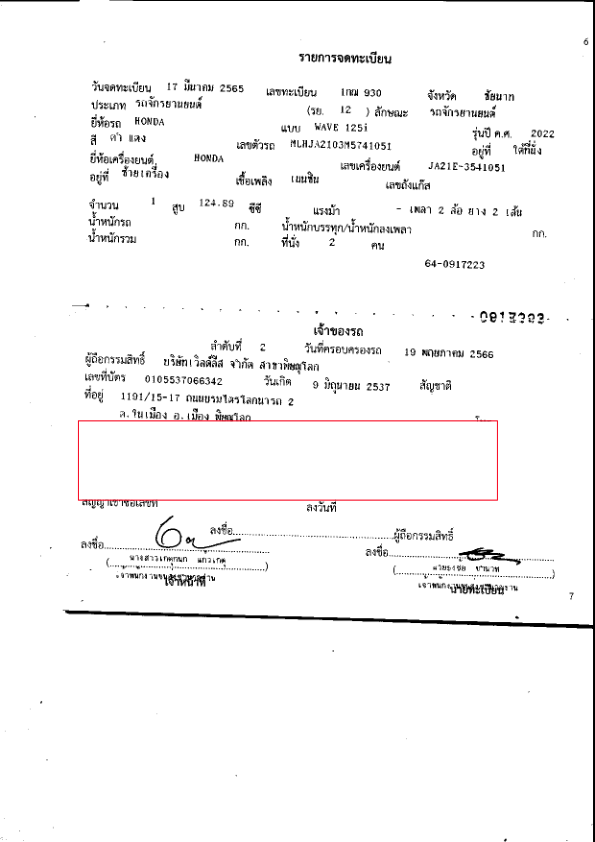
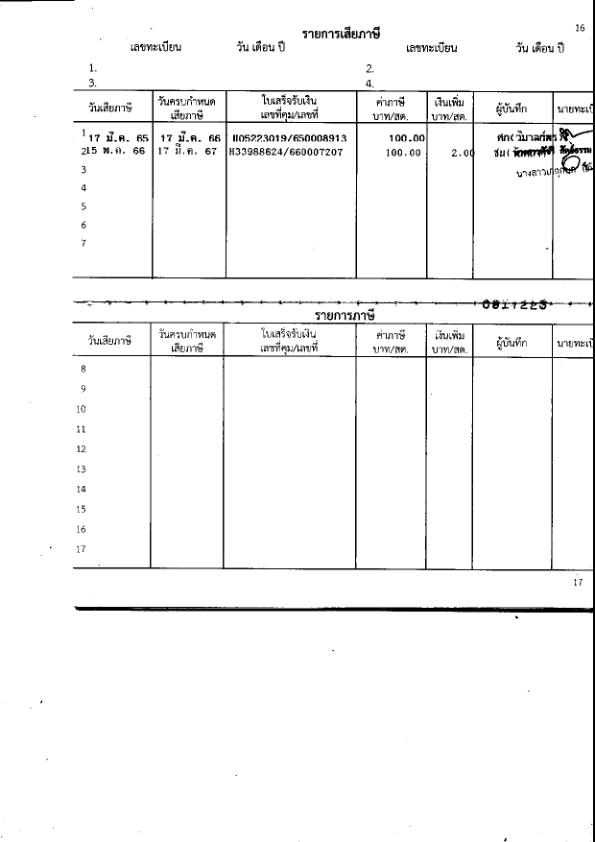
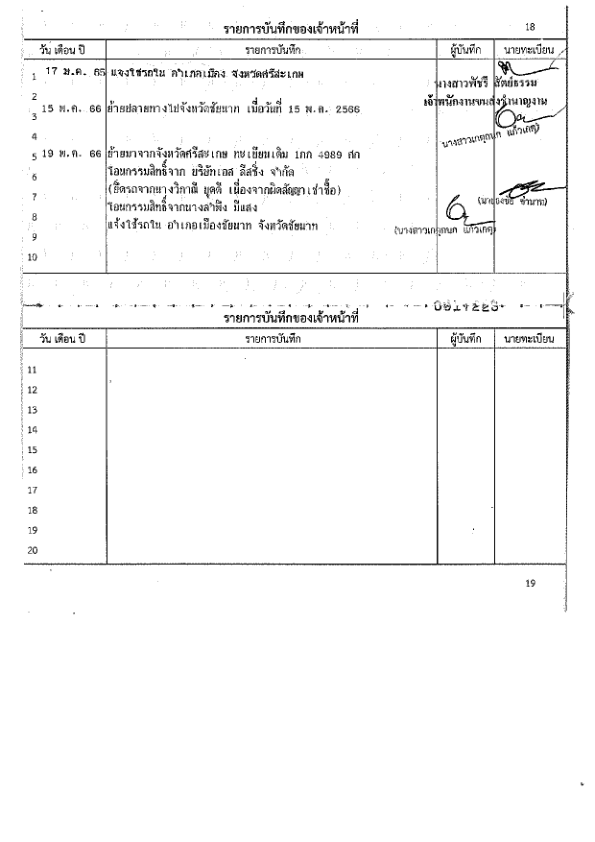


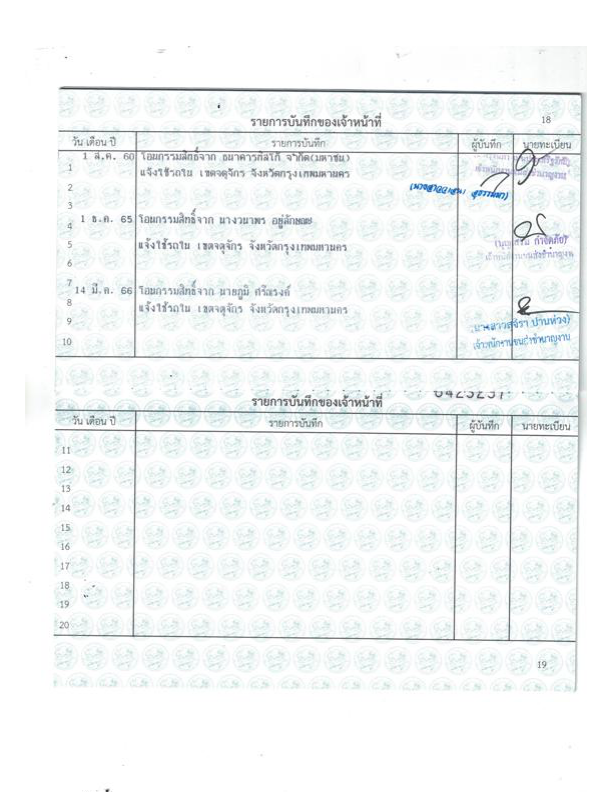
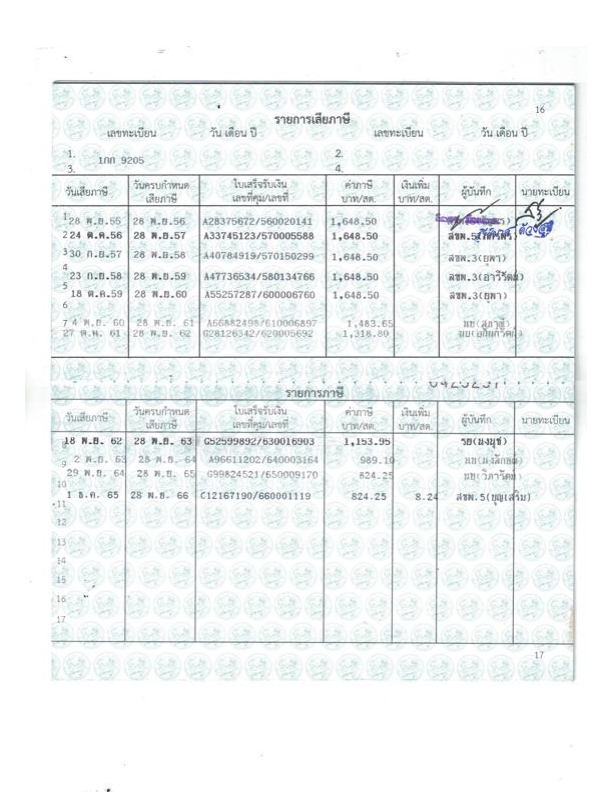
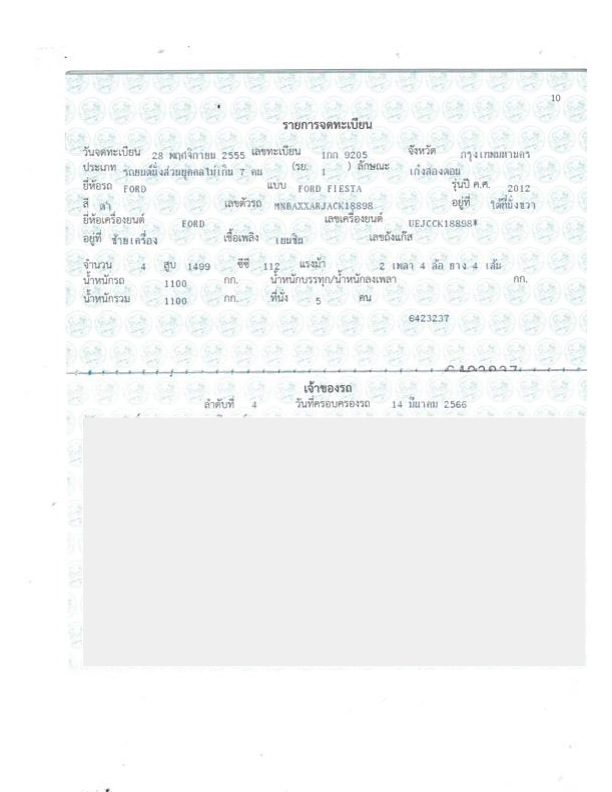

In [ ]:
display_html_result('MLHJA2103M5741051.pdf.html')
display_html_result('MNBAXXARJACK18898.pdf.html')

# Easy OCR

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 27.8 MB/s eta 0:00:00


In [ ]:
import os
import easyocr
from PIL import Image
import fitz  # PyMuPDF
import io
import base64
import numpy as np  # ต้อง import numpy

# ฟังก์ชัน OCR และบันทึกผลลัพธ์
def pdf_to_text_and_image(pdf_file, save_path):
    doc = fitz.open(pdf_file)
    output_html = ""

    # สร้างตัวอ่าน OCR
    reader = easyocr.Reader(['th', 'en'])  # กำหนดภาษาที่จะใช้

    for page_num in range(doc.page_count):
        page = doc.load_page(page_num)

        pix = page.get_pixmap()
        img = Image.open(io.BytesIO(pix.tobytes()))

        # แปลงภาพจาก PIL เป็น numpy array
        img_np = np.array(img)

        # ทำ OCR โดยใช้ easyocr
        result = reader.readtext(img_np, detail=0)  # เปลี่ยนเป็น img_np

        # รวมผลลัพธ์จาก OCR
        page_text = "\n".join(result)

        img_bytes = io.BytesIO()
        img.save(img_bytes, format='PNG')
        img_data = img_bytes.getvalue()
        img_base64 = base64.b64encode(img_data).decode('utf-8')

        output_html += f'''
        <div style="display: flex; align-items: flex-start; margin-bottom: 20px;">
            <div style="flex: 1; margin-right: 20px;">
                <img src="data:image/png;base64,{img_base64}" style="max-width: 100%; height: auto;" class="zoomable" onmouseover="zoom(this)" onmouseout="reset(this)">
            </div>
            <div style="flex: 2;">
                <h3>Page {page_num + 1}</h3>
                <pre>{page_text}</pre>
            </div>
        </div>
        <hr>
        '''

    # เพิ่ม CSS และ JavaScript สำหรับการซูม
    output_html = '''
    <html>
    <head>
        <style>
            .zoomable {
                transition: transform 0.2s; /* ทำให้การซูมดูนุ่มนวล */
                max-width: 100%;
                height: auto;
            }
            .zoomable:hover {
                transform: scale(1.5); /* ขยายเมื่อ hover */
                z-index: 10;
                position: relative; /* ทำให้ภาพที่ขยายอยู่เหนือส่วนอื่น */
            }
        </style>
        <script>
            function zoom(img) {
                img.style.transform = "scale(1.5)";
                img.style.zIndex = 10;
            }
            function reset(img) {
                img.style.transform = "scale(1)";
                img.style.zIndex = 1;
            }
        </script>
    </head>
    <body>
    ''' + output_html + '''
    </body>
    </html>
    '''

    with open(save_path, 'w', encoding='utf-8') as f:
        f.write(output_html)

# ฟังก์ชันสำหรับทำ OCR จาก PDF
def process_pdf(pdf_file, output_html_name):
    save_path = f"{output_html_name}-esocr.html"

    # ทำ OCR และบันทึกผลลัพธ์
    pdf_to_text_and_image(pdf_file, save_path)
    print(f"Processed {pdf_file} and saved to {save_path}")

# ตัวอย่างการใช้งาน
# เปลี่ยนชื่อไฟล์ PDF และชื่อไฟล์ HTML ที่ต้องการบันทึก
pdf_file = '/content/MLHJA2103M5741051.pdf'  # เปลี่ยนให้ตรงกับชื่อไฟล์ PDF ของคุณ
pdf_file2 = '/content/MNBAXXARJACK18898.pdf'  # เปลี่ยนให้ตรงกับชื่อไฟล์ PDF ของคุณ
process_pdf(pdf_file2, pdf_file2)

# ฟังก์ชันสำหรับแสดงผลลัพธ์จากไฟล์ HTML
def display_html_result(html_file):
    from IPython.core.display import display, HTML
    with open(html_file, 'r', encoding='utf-8') as f:
        display(HTML(f.read()))


Processed /content/MNBAXXARJACK18898.pdf and saved to /content/MNBAXXARJACK18898.pdf-esocr.html



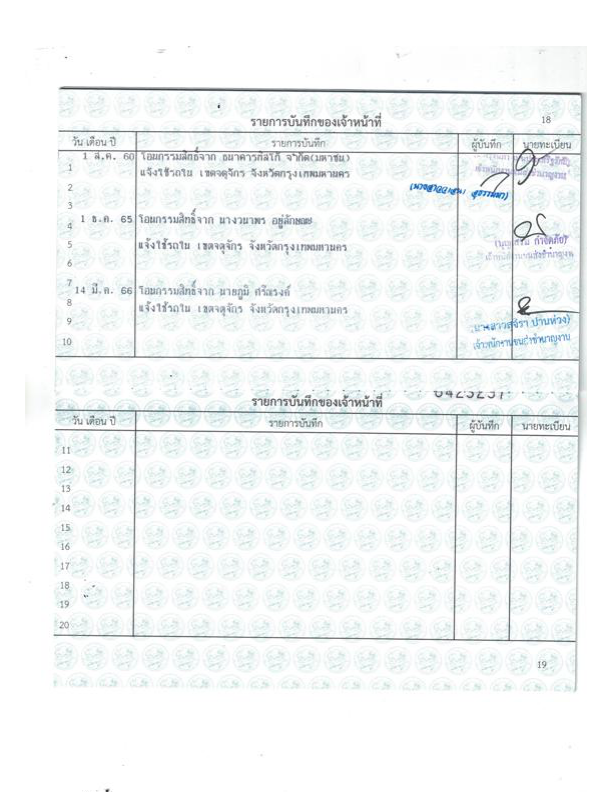
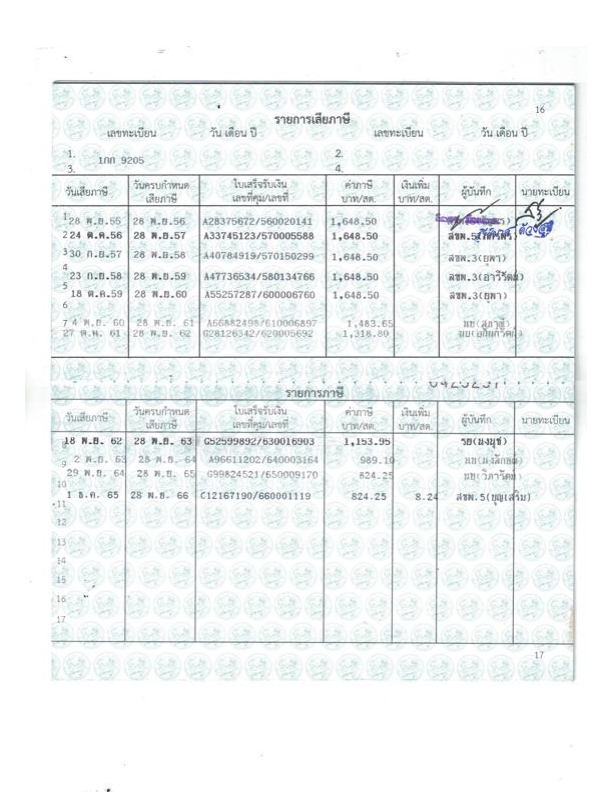
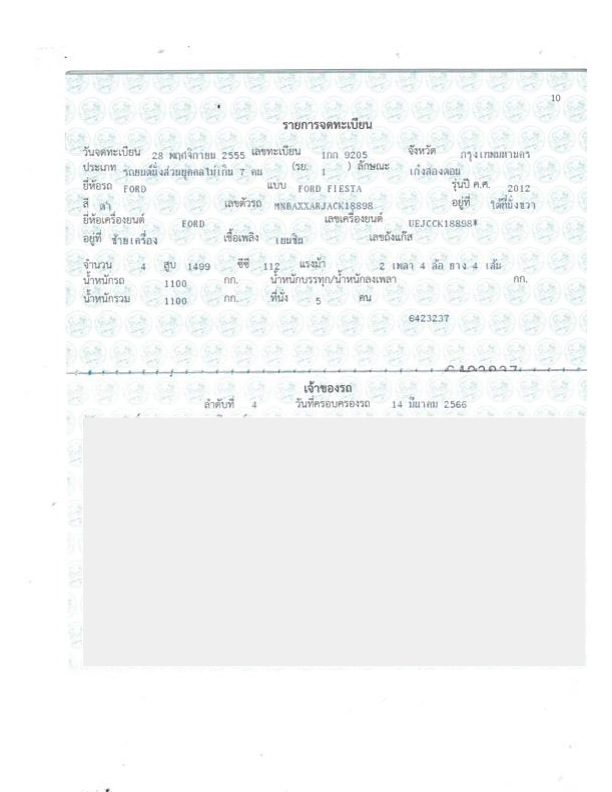


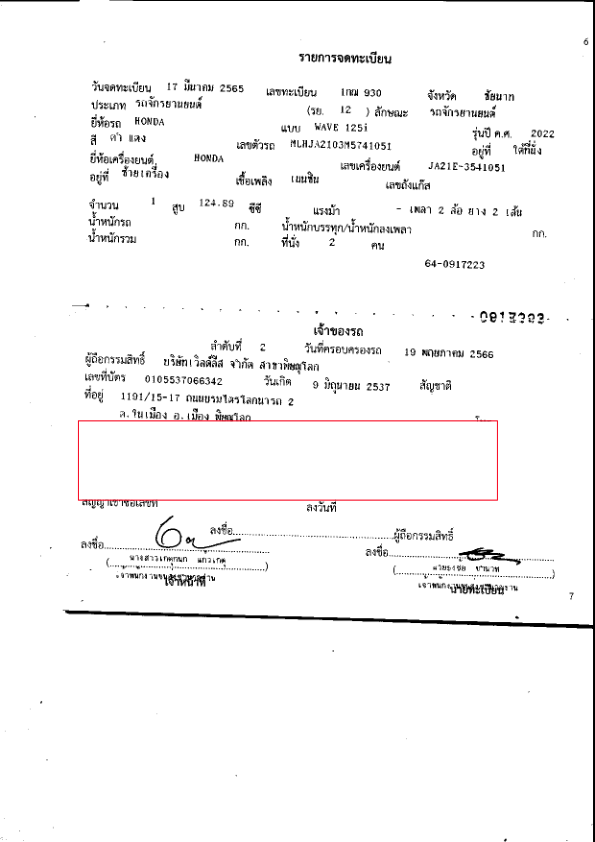
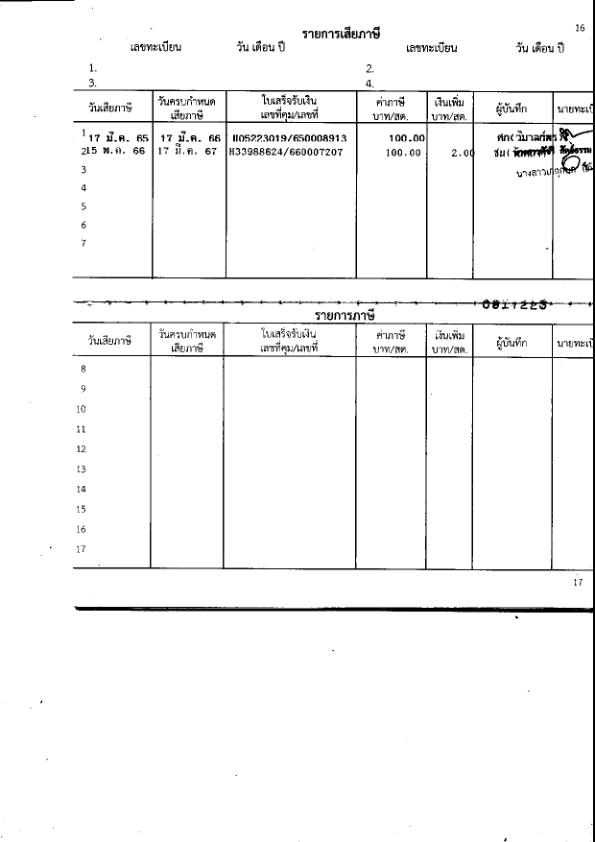
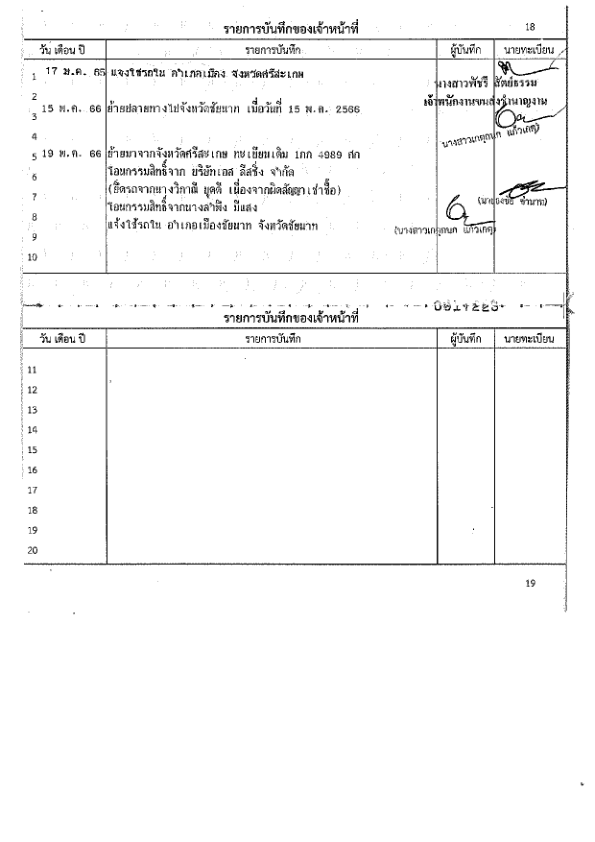

In [ ]:
display_html_result('MNBAXXARJACK18898.pdf-esocr.html')
display_html_result('MLHJA2103M5741051.pdf-esocr.html')

# File Info

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Define the path to the uploaded file and the target directory for extraction
zip_path = '/content/Motto_Auction-lane_2-28_10_2024-14_47 copy.zip'
extract_path = '/Project'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Walk through the extracted directory to list the files and structure
directory_structure = []
for root, dirs, files in os.walk(extract_path):
    # Skip the root directory name in the output
    level = root.replace(extract_path, '').count(os.sep)
    indent = '│   ' * level + '├── '
    directory_structure.append(f"{indent}{os.path.basename(root)}/")
    subindent = '│   ' * (level + 1) + '├── '
    for f in files:
        directory_structure.append(f"{subindent}{f}")

# Save directory structure to 'info.txt'
directory_structure_text = "\n".join(directory_structure)
with open("info.txt", "w") as file:
    file.write(directory_structure_text)

# Load Image

In [ ]:
!rm -rf /content/downloads/*

In [ ]:
import os
import json
import pandas as pd
import requests
import sys
import re

downloads_dir = os.path.join('downloads', 'Motto_Auction')
output_dir = os.path.join('downloads', 'Motto_Auction')
log_dir = os.path.join('Motto_Auction')

def create_dir(dir_path):
    os.makedirs(dir_path, exist_ok=True)

def write_log(log_file_path, message):
    with open(log_file_path, 'a', encoding='utf-8') as log_file:
        log_file.write(message + '\n')

def download_image(url, dest, log_file_path):
    try:
        if os.path.exists(dest):
            write_log(log_file_path, f"Skipping download; file already exists: {dest}")
            return True  # Image already exists

        response = requests.get(url, stream=True)
        if response.status_code == 200:
            with open(dest, 'wb') as f:
                for chunk in response.iter_content(1024):
                    f.write(chunk)
            return True  # Successful download
        else:
            write_log(log_file_path, f"Failed to download {url}: Status code {response.status_code}")
            return False  # Failed download
    except Exception as e:
        write_log(log_file_path, f"Error downloading {url}: {e}")
        return False  # Error during download

def get_base_folder(file_name):
    # Extract base folder name, including the full date format (e.g., "-28_10_2024")
    match = re.match(r"(.*?-\d{2}_\d{2}_\d{4})", file_name)
    return match.group(1) if match else file_name

def process_csv(file_path):
    file_name = os.path.basename(file_path).replace('.csv', '')
    base_folder_name = get_base_folder(file_name)

    # Determine base folder path
    base_dir = os.path.join(output_dir, base_folder_name)
    create_dir(base_dir)
    log_file_path = os.path.join(log_dir, f"{file_name}.log")

    # Ensure log directory exists
    os.makedirs(log_dir, exist_ok=True)

    write_log(log_file_path, f"Processing file: {file_name}.csv")

    image_dir = os.path.join(base_dir, 'images')
    create_dir(image_dir)

    # Read the CSV file with UTF-8 encoding
    df = pd.read_csv(file_path, encoding='utf-8')

    updated_rows = []
    total_images = successful_images = 0

    for _, row in df.iterrows():
        license_plate = str(row['licensePlate']).strip()
        registration_province = str(row['registrationProvince']).strip()

        # Combine licensePlate and registrationProvince to form the folder name
        reg_folder = f"{license_plate} {registration_province}".strip()

        # Skip rows where either licensePlate or registrationProvince is empty or null
        if not license_plate or license_plate.lower() == 'nan' or not registration_province or registration_province.lower() == 'nan':
            continue

        reg_image_dir = os.path.join(image_dir, reg_folder)
        create_dir(reg_image_dir)

        image_urls = str(row['imageUrl']).split(' | ') if pd.notna(row['imageUrl']) else []
        new_image_urls = []

        for url in image_urls:
            if not url.strip():
                continue  # Skip empty URLs

            image_name = os.path.basename(url.split('?')[0])
            dest_path = os.path.join(reg_image_dir, image_name)

            total_images += 1
            if download_image(url, dest_path, log_file_path):
                successful_images += 1

                # **Update the URL format to match the new folder structure**
                new_url = os.path.join('downloads', 'Motto_Auction', base_folder_name, 'images', reg_folder, image_name).replace('\\', '/')
                new_image_urls.append(new_url)
            else:
                write_log(log_file_path, f"Failed to download image: {url}")

        # Store the updated row with the new Image URLs
        row['imageUrl'] = ' | '.join(new_image_urls)
        updated_rows.append(row)

    # Write updated rows to a NEW CSV file with UTF-8 encoding
    updated_csv_path = os.path.join(base_dir, f"{file_name}.csv")
    updated_df = pd.DataFrame(updated_rows)
    updated_df.to_csv(updated_csv_path, index=False, encoding='utf-8')

    # Remove the original CSV file
    os.remove(file_path)
    write_log(log_file_path, f"Original CSV file deleted: {file_path}")

    # Write summary to log file
    write_log(log_file_path, f"Total images: {total_images}, Successfully downloaded: {successful_images}")
    write_log(log_file_path, f"Updated CSV saved at: {updated_csv_path}")

def main():
    file = "/content/Motto_Auction_lane_2-28_10_2024-14_55.csv"
    csv_file_path = os.path.join(downloads_dir, file)
    if os.path.exists(csv_file_path):
        process_csv(csv_file_path)
    else:
        print(f"File not found: {csv_file_path}")

if __name__ == "__main__":
    main()
